<center>
<h1> ARIMA <h1>
<center>

In [49]:
import pandas as pd
from neuralprophet import NeuralProphet
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import matplotlib
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error, mean_squared_log_error
import pmdarima as pm
from pmdarima import auto_arima

In [50]:

df = pd.read_csv('SP500_Datos.csv')
df = df['y'][-7000:]


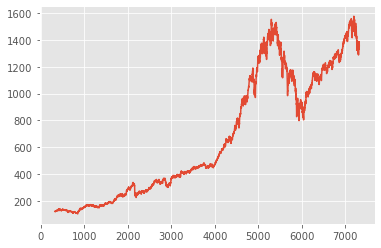

In [51]:
df.plot();

In [52]:
train = df.iloc[:-300]
test = df.iloc[-300:]
print(train.shape, test.shape)

(6700,) (300,)


In [45]:
model = pm.auto_arima(train, trace=True,suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=44376.535, Time=10.89 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=44479.445, Time=0.39 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=44383.026, Time=0.70 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=44378.592, Time=1.72 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=44483.296, Time=0.53 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=44375.384, Time=4.63 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=44379.713, Time=2.77 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=44379.934, Time=2.17 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=44376.562, Time=10.64 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=44378.691, Time=2.87 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=44374.661, Time=4.96 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=44378.437, Time=0.92 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=44380.972, Time=2.76 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=44378.979, Time=1.73 sec
 ARIMA(3,1,2)(0,0

In [53]:
model=ARIMA(df,order=(2,1,1))
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                 6999
Model:                 ARIMA(2, 1, 1)   Log Likelihood              -23538.121
Method:                       css-mle   S.D. of innovations              6.988
Date:                Mon, 04 Apr 2022   AIC                          47086.242
Time:                        20:54:44   BIC                          47120.510
Sample:                             1   HQIC                         47098.051
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1767      0.084      2.114      0.035       0.013       0.340
ar.L1.D.y      0.8828      0.083     10.645      0.000       0.720       1.045
ar.L2.D.y     -0.1157      0.013     -8.964      0.000      -0.141      -0.090
ma.L1.D.y     -0.7669      0.083     -9.270      0.000      -0.929      -0.605
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.3838           +0.0000j            1.3838            0.0000
AR.2            6.2442           +0.0000j            6.2442            0.0000
MA.1            1.3039           +0.0000j            1.3039            0.0000
-----------------------------------------------------------------------------
"""

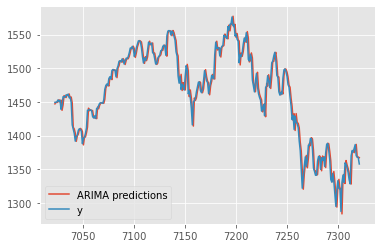

In [54]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA predictions')
pred.plot(legend=True);
test.plot(legend=True);

In [55]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print("MSE: ", mean_squared_error(pred.values,test.values))
print("MAE: ", mean_absolute_error(pred.values,test.values))
print("PPA: ", np.mean(test.values))

MSE:  156.01654635585754
MAE:  9.045963404111804
PPA:  1461.3427666666666
